In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\SHAREEQ\Downloads\supermarket_sales - Sheet1.csv")

In [3]:
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [13]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('Quantity', axis=1) 
y = df['Quantity']

Unit price             0
Quantity               0
Tax 5%                 0
Total                  0
cogs                   0
                      ..
Time_20:55             0
Time_20:57             0
Time_20:59             0
Payment_Credit card    0
Payment_Ewallet        0
Length: 1613, dtype: int64


In [22]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df)


     Unit price  Quantity   Tax 5%      Total    cogs  \
0         74.69         7  26.1415   548.9715  522.83   
1         15.28         5   3.8200    80.2200   76.40   
2         46.33         7  16.2155   340.5255  324.31   
3         58.22         8  23.2880   489.0480  465.76   
4         86.31         7  30.2085   634.3785  604.17   
..          ...       ...      ...        ...     ...   
995       40.35         1   2.0175    42.3675   40.35   
996       97.38        10  48.6900  1022.4900  973.80   
997       31.84         1   1.5920    33.4320   31.84   
998       65.82         1   3.2910    69.1110   65.82   
999       88.34         7  30.9190   649.2990  618.38   

     gross margin percentage  gross income  Rating  Invoice ID_101-81-4070  \
0                   4.761905       26.1415     9.1                   False   
1                   4.761905        3.8200     9.6                   False   
2                   4.761905       16.2155     7.4                   False   
3  

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.8692366444045607
R^2 Score: 0.7602920444853234


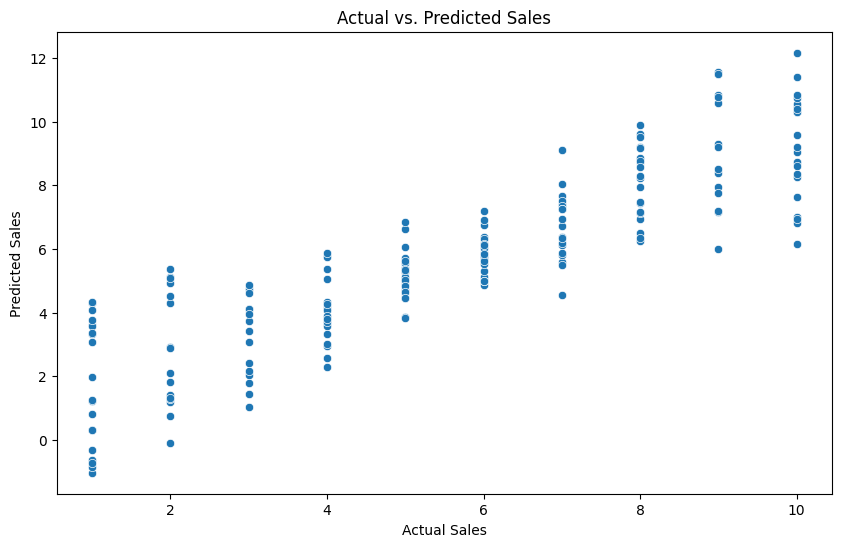

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score (Random Forest):", r2_score(y_test, y_pred_rf))

Mean Squared Error (Random Forest): 0.061362999999999994
R^2 Score (Random Forest): 0.9921309057800263


In [25]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\SHAREEQ\Downloads\supermarket_sales - Sheet1.csv")

# Display the first few rows to understand the column names and data
print(df.head())

# Optional: Handle missing values
df = df.fillna(0)

# Ensure columns are treated as strings before conversion to numeric
df['Quantity'] = df['Quantity'].astype(str)
df['Total'] = df['Total'].astype(str)
df['Unit Price'] = df['Unit price'].astype(str)
df['Rating'] = df['Rating'].astype(str)

# Convert columns to numeric if needed
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculate the average for each column
average_quantity = df['Quantity'].mean()
average_total = df['Total'].mean()

# Display the results
print(f"Average Quantity: {average_quantity:.2f}")
print(f"Average Total: {average_total:.2f}")


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

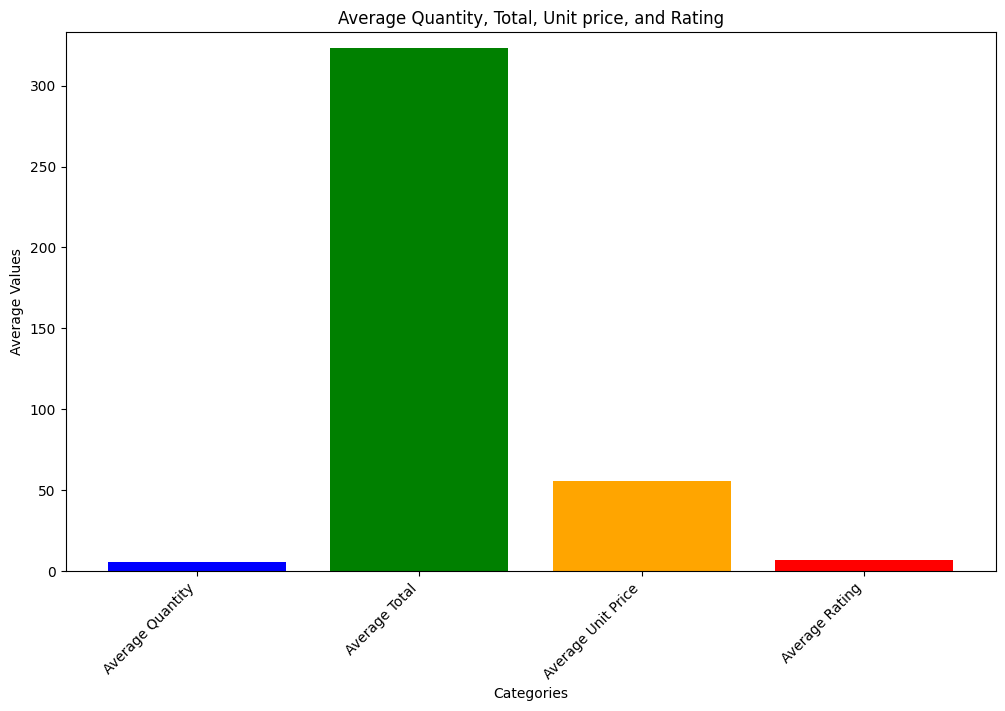

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\SHAREEQ\Downloads\supermarket_sales - Sheet1.csv")

# Display the first few rows to understand the column names and data
print(df.head())

# Optional: Handle missing values
df = df.fillna(0)

# Ensure columns are treated as strings before conversion to numeric
df['Quantity'] = df['Quantity'].astype(str)
df['Total'] = df['Total'].astype(str)
df['Unit Price'] = df['Unit price'].astype(str)
df['Rating'] = df['Rating'].astype(str)

# Convert columns to numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


# Calculate the average for each column
average_quantity = df['Quantity'].mean()
average_total = df['Total'].mean()
average_unit_price = df['Unit price'].mean()
average_rating = df['Rating'].mean()

# Display the results
print(f"Average Quantity: {average_quantity:.2f}")
print(f"Average Total: {average_total:.2f}")
print(f"Average Unit Price: {average_unit_price:.2f}")
print(f"Average Rating: {average_rating:.2f}")

# Plotting the results in a bar graph
categories = ['Average Quantity', 'Average Total', 'Average Unit Price', 'Average Rating']
values = [average_quantity, average_total, average_unit_price, average_rating]

plt.figure(figsize=(12, 7))
plt.bar(categories, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Categories')
plt.ylabel('Average Values')
plt.title('Average Quantity, Total, Unit price, and Rating')
plt.ylim(0, max(values) + 10) # Adjust the y-axis to make the graph more readable
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()
